In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay,roc_auc_score,roc_curve
from sklearn import metrics
import pickle
%matplotlib inline

#Train test Split
from sklearn.model_selection import train_test_split

#Applying Standardization
from sklearn.preprocessing import StandardScaler

#OneHotEncoding
from sklearn.preprocessing import OneHotEncoder

#Dealing with imbalanced dataset SMOTENC
from imblearn.over_sampling import SMOTENC

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [89]:
df = pd.read_csv("C:\Anto\DataScience-main\Practice Projects\Auto insruance claim fraud detection - Working copy\insurance fraud claims.csv")

In [90]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [91]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [93]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [94]:
df['policy_annual_premium'] = df['policy_annual_premium'].astype('int64')

In [95]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [96]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

To Find the Unique Values

In [97]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,":", df[i].nunique())

policy_bind_date : 951
policy_state : 3
policy_csl : 3
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_date : 60
incident_type : 4
collision_type : 4
incident_severity : 4
authorities_contacted : 5
incident_state : 7
incident_city : 7
incident_location : 1000
property_damage : 3
police_report_available : 3
auto_make : 14
auto_model : 39
fraud_reported : 2


In [98]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

We have '?' in three of the columns[collision_type,property_damage,police_report_available] and will replace that with NaN

In [99]:
df.replace('?',np.nan,inplace=True)

Replace the NaN with mode for the columns with NaN

In [100]:
df['collision_type'] =df['collision_type'].fillna(df['collision_type'].mode()[0])

In [101]:
df['property_damage'] =df['property_damage'].fillna(df['property_damage'].mode()[0])

In [102]:
df['police_report_available'] =df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [103]:
countplot_columns = ['insured_sex','incident_type','collision_type','incident_severity','witnesses','property_damage','authorities_contacted']

In [104]:
list(enumerate(countplot_columns))

[(0, 'insured_sex'),
 (1, 'incident_type'),
 (2, 'collision_type'),
 (3, 'incident_severity'),
 (4, 'witnesses'),
 (5, 'property_damage'),
 (6, 'authorities_contacted')]

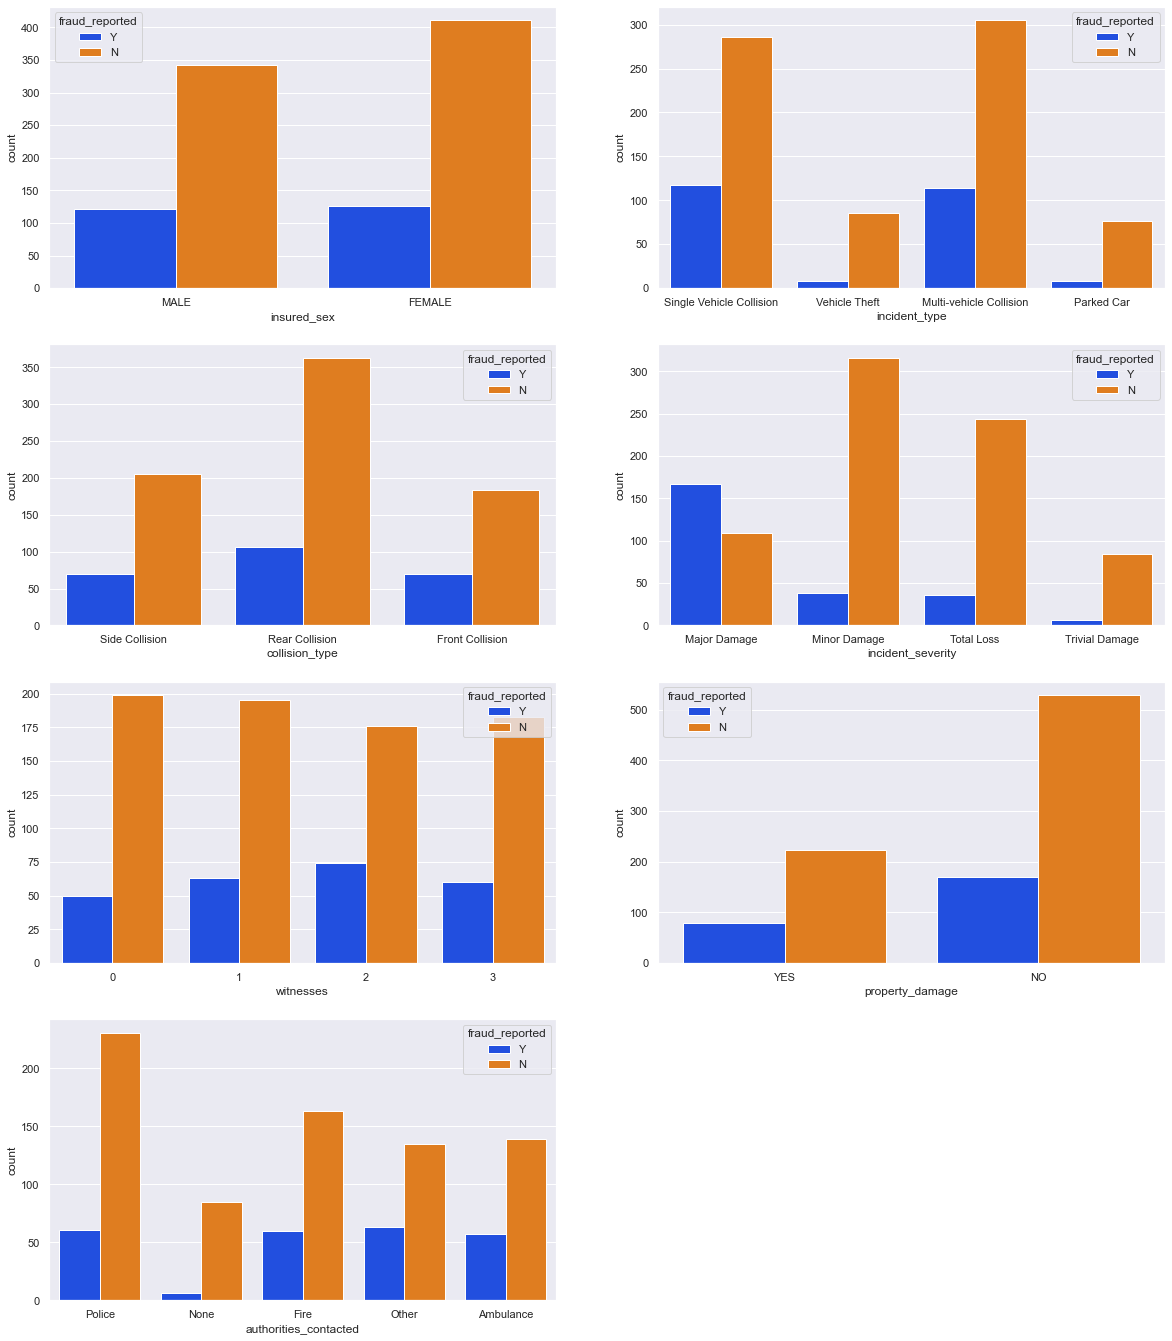

In [105]:
plt.figure(figsize=[20,30])
for i in enumerate(countplot_columns):
    plt.subplot(5,2,i[0]+1)
    sns.countplot(data=df, x =i[1],hue='fraud_reported',palette='bright')

In [106]:
histplot_columns = ['policy_deductable','policy_annual_premium', 'umbrella_limit','capital-gains','capital-loss','months_as_customer','age','total_claim_amount']

In [107]:
list(enumerate(histplot_columns))

[(0, 'policy_deductable'),
 (1, 'policy_annual_premium'),
 (2, 'umbrella_limit'),
 (3, 'capital-gains'),
 (4, 'capital-loss'),
 (5, 'months_as_customer'),
 (6, 'age'),
 (7, 'total_claim_amount')]

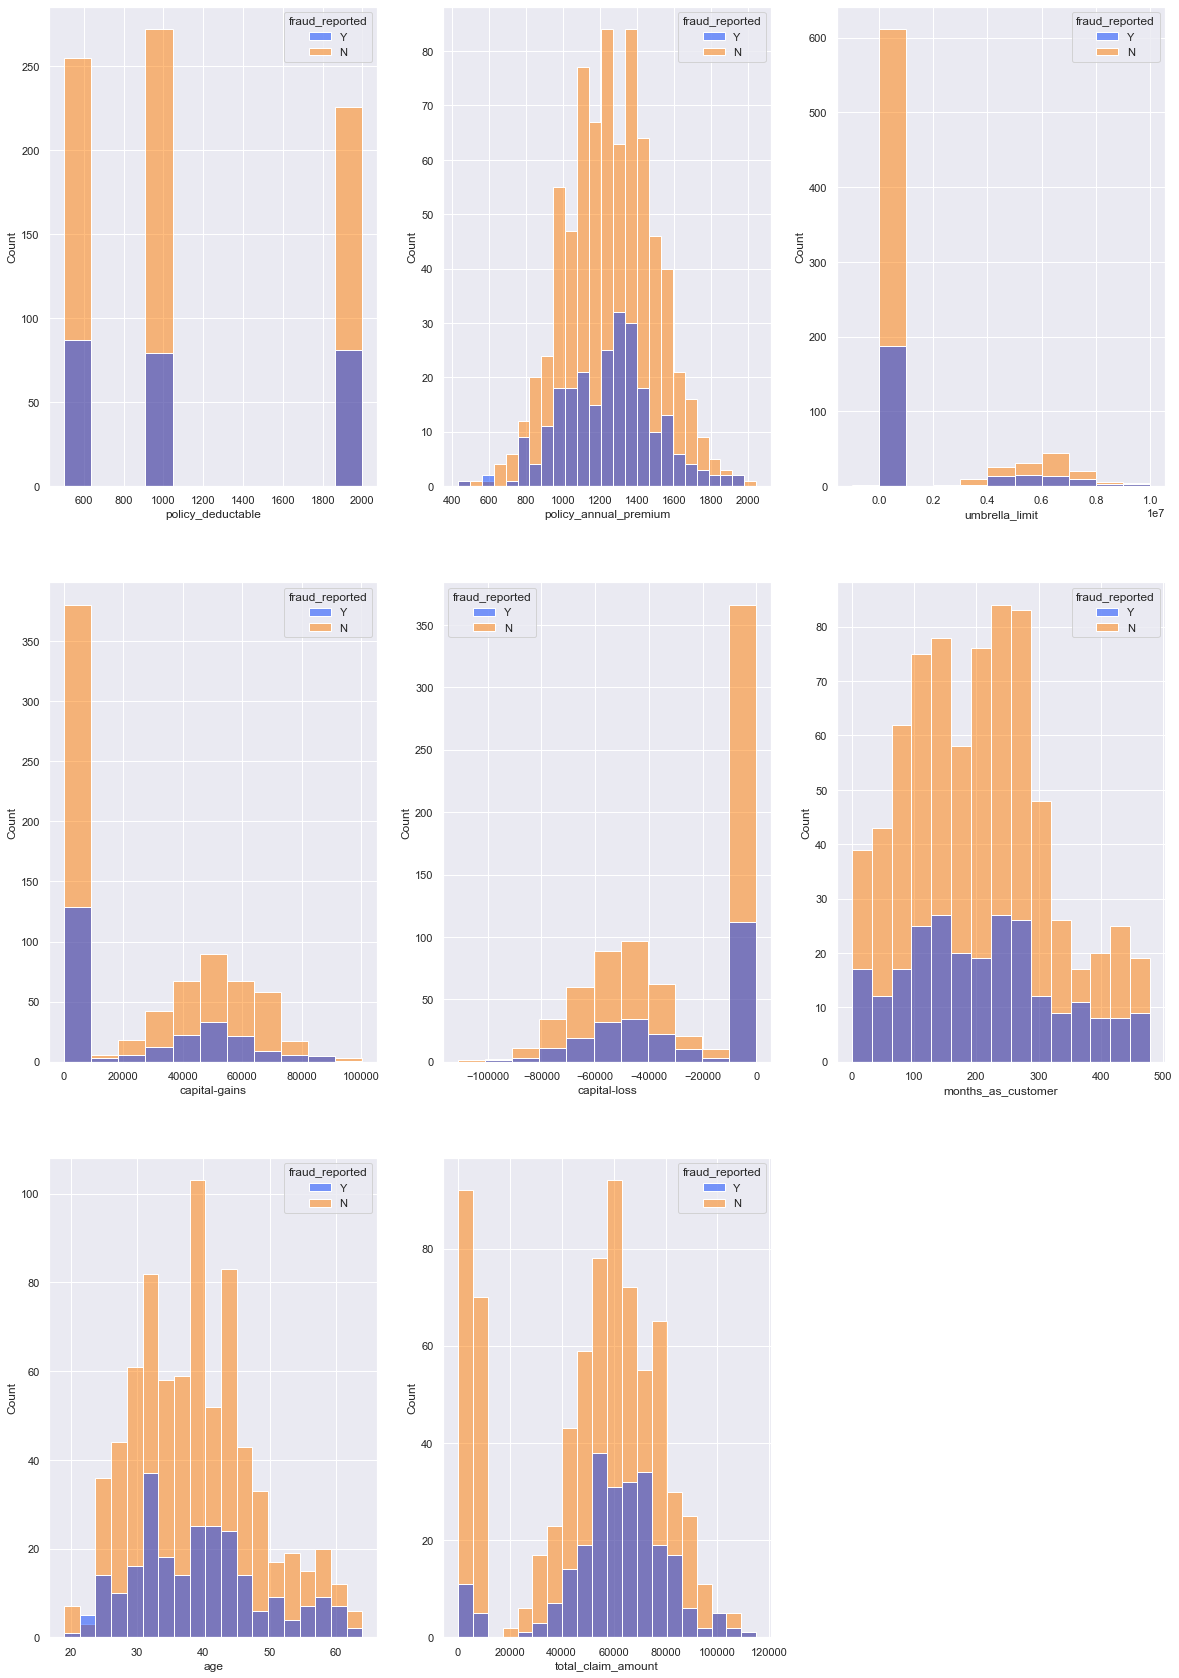

In [108]:
plt.figure(figsize=[20,30])
for z in enumerate(histplot_columns):
    plt.subplot(3,3,z[0]+1)
    sns.histplot(df,x =z[1],hue='fraud_reported',palette='bright')

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

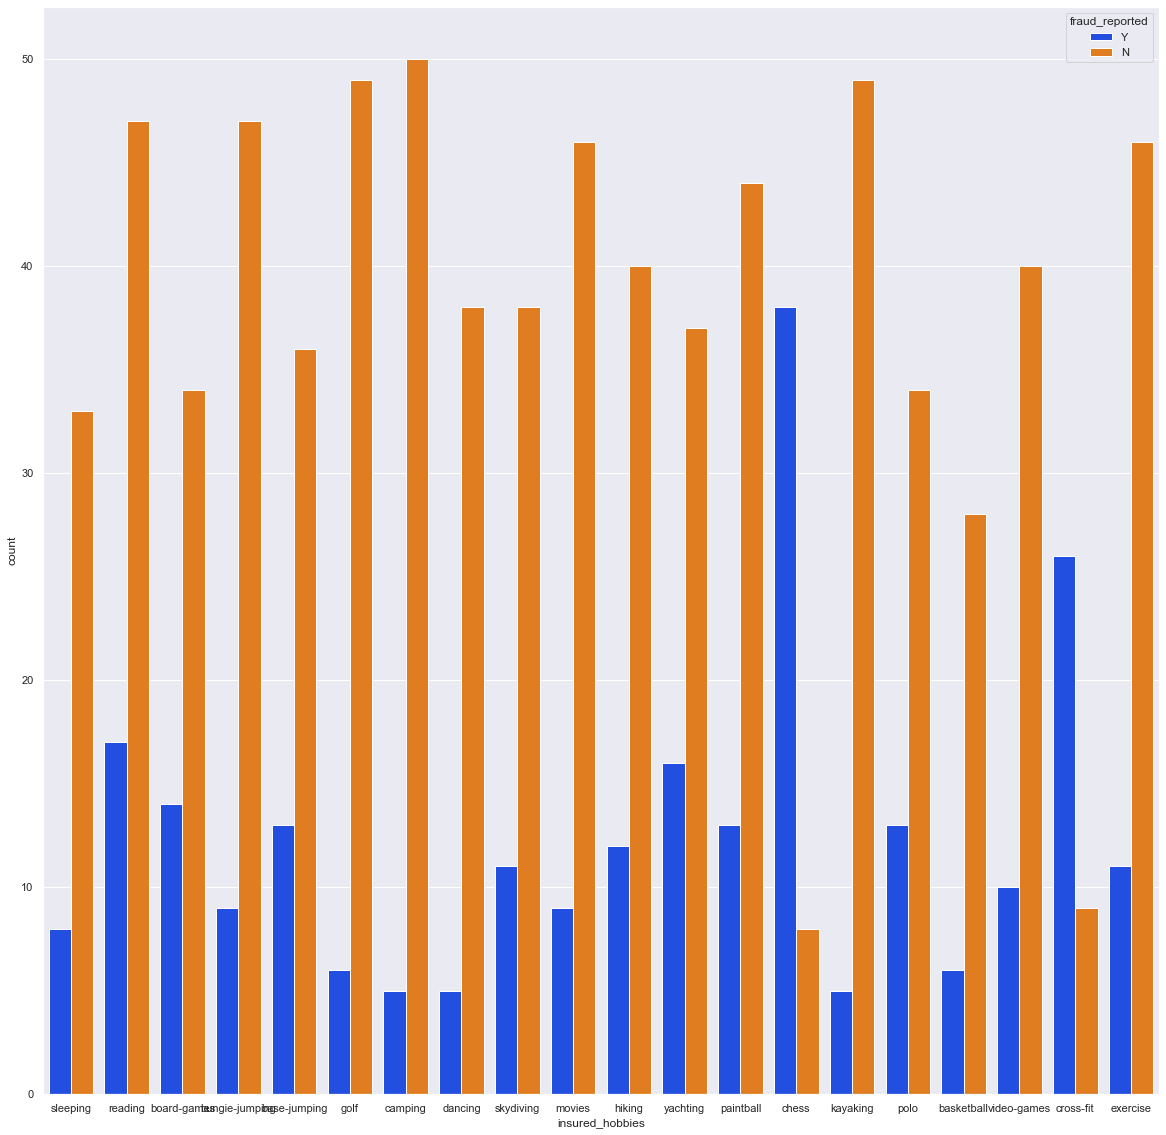

In [109]:
sns.set(rc={'figure.figsize':(20,20)})
sns.countplot(x='insured_hobbies',data=df,hue='fraud_reported',palette='bright')

<AxesSubplot:xlabel='auto_model', ylabel='count'>

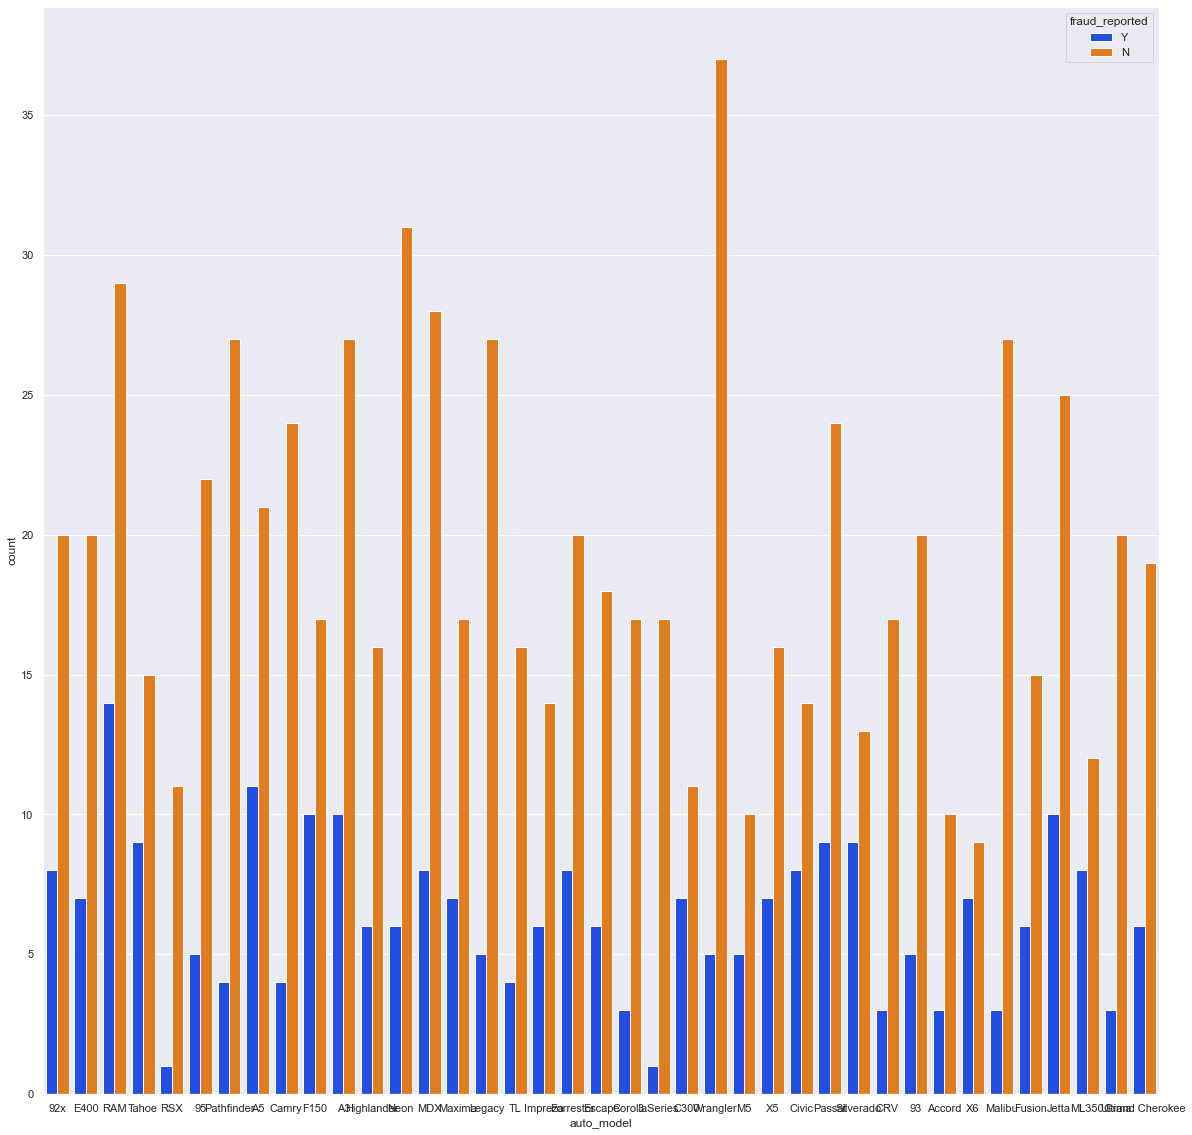

In [110]:
sns.countplot(data=df,x='auto_model',hue='fraud_reported',palette='bright')

In [111]:
df['fraud_reported'] = pd.get_dummies(df['fraud_reported'],drop_first=True,dtype=np.int64)

In [112]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

This looks like an imbalanced dataset. We will apply SMOTENC to this dataset later to resolve this problem

Identify the Correlation between variables

<AxesSubplot:>

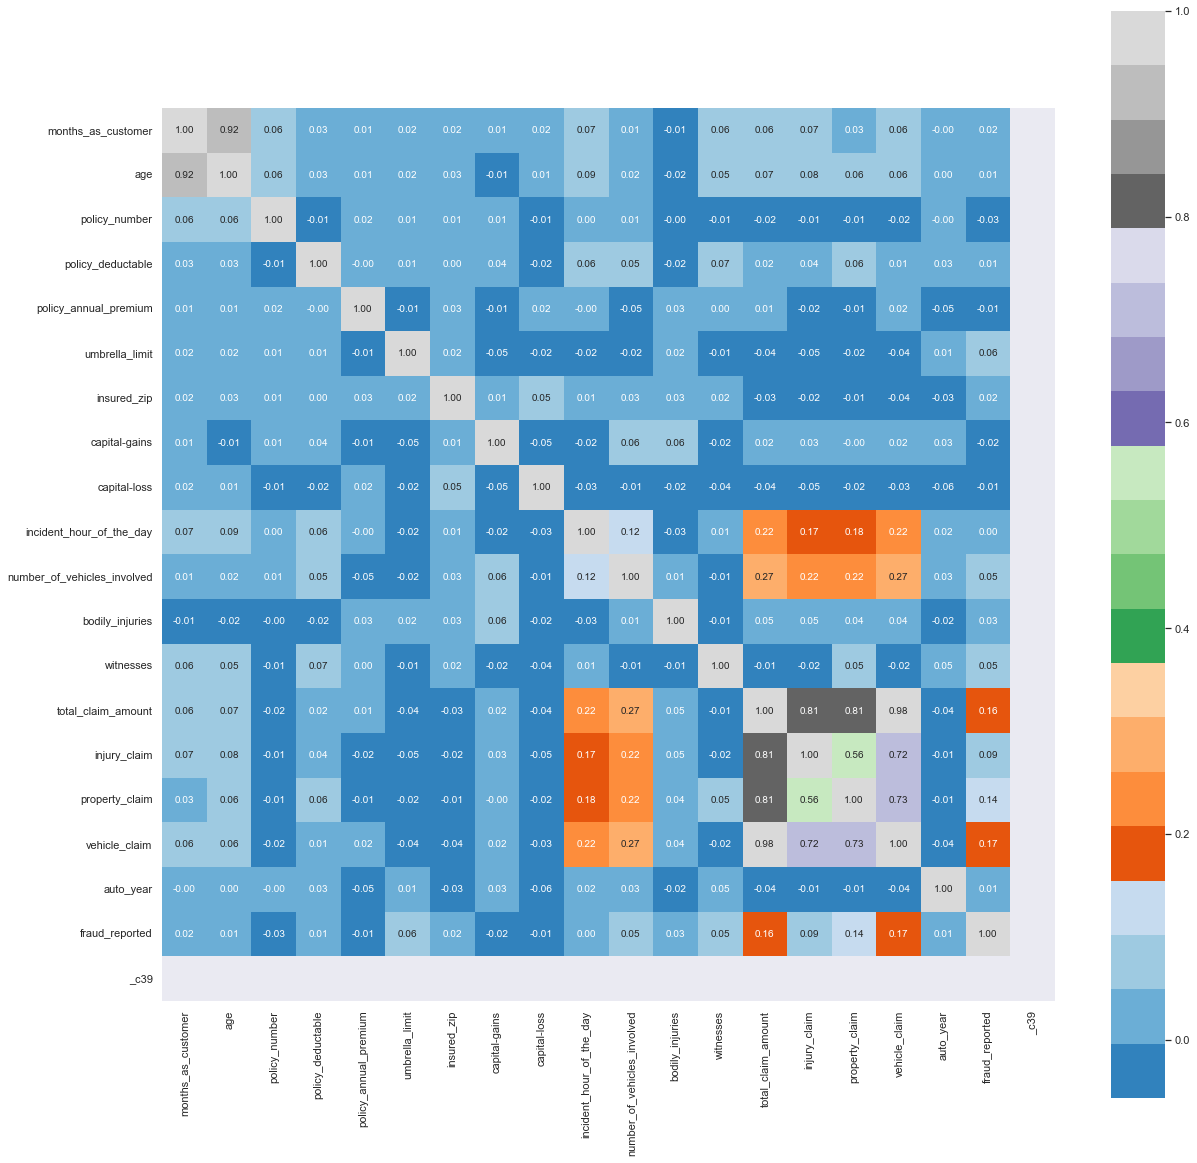

In [113]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df.corr(),annot=True,cbar=True,square=True,cmap='tab20c',annot_kws={'size': 10},fmt='.2f')

<AxesSubplot:>

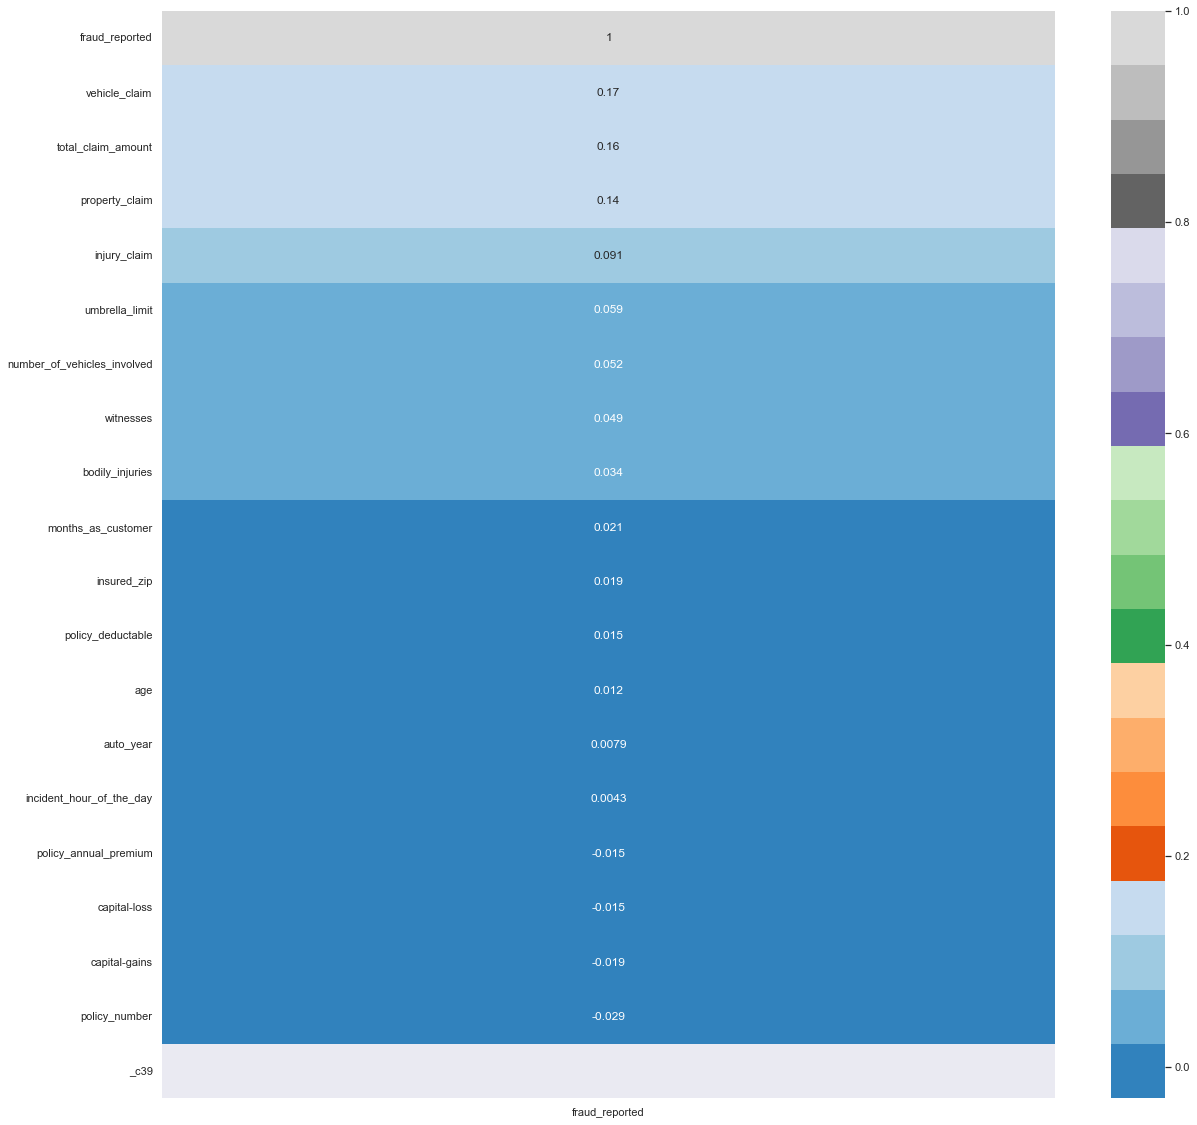

In [114]:
sns.heatmap(df.corr()[['fraud_reported']].nlargest(40,'fraud_reported'),annot=True,cmap='tab20c')

Drop the columns which is not correlated and which we think is not adding any value to the prediction

In [115]:
col_drop = ['policy_number','policy_bind_date','policy_state','policy_csl','policy_annual_premium','insured_zip','insured_hobbies','insured_relationship','capital-gains','capital-loss','incident_date','incident_state','incident_city','incident_location','injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year','_c39']

In [116]:
df.drop(col_drop,axis=1,inplace=True)

In [117]:
num_df = df.select_dtypes(include = ['int64']).drop('fraud_reported', axis=1)

In [118]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount'],
      dtype='object')

In [119]:
num_df_col_names = num_df.columns

In [120]:
cat_df = df.select_dtypes(include = ['object'])

In [121]:
cat_df.columns

Index(['insured_sex', 'insured_education_level', 'insured_occupation',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'property_damage', 'police_report_available'],
      dtype='object')

Apply OneHotEncoding to Categorical Variables

In [122]:
enc = OneHotEncoder(handle_unknown='ignore',drop='first')
cat_enc_data=pd.DataFrame(enc.fit_transform(df[['insured_sex', 'insured_education_level', 'insured_occupation',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'property_damage', 'police_report_available']]).toarray())

In [123]:
enc.get_feature_names_out()

array(['insured_sex_MALE', 'insured_education_level_College',
       'insured_education_level_High School',
       'insured_education_level_JD', 'insured_education_level_MD',
       'insured_education_level_Masters', 'insured_education_level_PhD',
       'insured_occupation_armed-forces',
       'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'incident_type_Parked Car',
       'incident_type_Single Vehicle Collision',
       'incident_type_Vehicle Theft', 'collision_type_Rear Collision',
       'collision_type_Side Collision', 'in

In [124]:
cat_enc_data.columns = enc.get_feature_names_out()

In [125]:
cat_enc_data

,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [126]:
X = pd.concat([num_df, cat_enc_data], axis = 1)

In [127]:
y = df['fraud_reported']

Split into Train and Test 

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123,stratify=y)

Applying Standardization

In [129]:
scaler = StandardScaler()

In [130]:
X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train[num_df_col_names]),
columns=num_df_col_names, index= X_train.index)

In [131]:
for col in num_df:
        X_train[col] = X_train_num_scaled[col]

In [132]:
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test[num_df_col_names]),
columns=num_df_col_names, index= X_test.index)

In [133]:
for col in num_df:
        X_test[col] = X_test_num_scaled[col]

In [134]:
list(range(len(num_df_col_names),43))

[9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42]

In [135]:
cat_col_index = list(range(len(num_df_col_names),43))

Apply SMOTENC to the imbalanced dataset

In [136]:
#Instantiate SMOTENC algorith with 60% oversampling
sm = SMOTENC(categorical_features=cat_col_index, random_state=123, sampling_strategy=.6)

In [137]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [138]:
X_train.value_counts()

months_as_customer  age        policy_deductable  umbrella_limit  incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  witnesses  total_claim_amount  insured_sex_MALE  insured_education_level_College  insured_education_level_High School  insured_education_level_JD  insured_education_level_MD  insured_education_level_Masters  insured_education_level_PhD  insured_occupation_armed-forces  insured_occupation_craft-repair  insured_occupation_exec-managerial  insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  insured_occupation_other-service  insured_occupation_priv-house-serv  insured_occupation_prof-specialty  insured_occupation_protective-serv  insured_occupation_sales  insured_occupation_tech-support  insured_occupation_transport-moving  incident_type_Parked Car  incident_type_Single Vehicle Collision  incident_type_Vehicle Theft  collision_type_Rear Collision  collision_type_Side Collision  incident_severity

In [139]:
y_train.value_counts()

0    527
1    316
Name: fraud_reported, dtype: int64

### LogisticRegression

In [140]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [141]:
#Training dataset
log_reg_pred_train = log_reg.predict(X_train)
log_reg_acc_train = accuracy_score(y_train,log_reg_pred_train)
print("Accuracy of Logistic regression for training data is :","{:.2f}%".format(100*log_reg_acc_train))

#Testing dataset
log_reg_pred_test = log_reg.predict(X_test)
log_reg_acc_test = accuracy_score(y_test,log_reg_pred_test)
print("Accuracy of Logistic regression for testing data is :","{:.2f}%".format(100*log_reg_acc_test ))

Accuracy of Logistic regression for training data is : 86.36%
Accuracy of Logistic regression for testing data is : 78.00%


### Support Vector Machine

In [142]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [143]:
##Training dataset
svc_pred_train = svc.predict(X_train)
svc_acc_train = accuracy_score(y_train,svc_pred_train)
print("Accuracy of SVC for training data is :","{:.2f}%".format(100*svc_acc_train))

##Testing dataset
svc_pred_test = svc.predict(X_test)
svc_acc_test = accuracy_score(y_test,svc_pred_test)
print("Accuracy of SVC for testing data is :","{:.2f}%".format(100*svc_acc_test))

Accuracy of SVC for training data is : 90.75%
Accuracy of SVC for testing data is : 77.33%


In [144]:
#Hyperparameter Tuning
params = {
    'C':[50,10,1.0, 0.1, 0.01],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'gamma': ['scale']
}

grid_search_svc = GridSearchCV(svc,params,cv=5,n_jobs=-1,verbose=1)
grid_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             verbose=1)

In [145]:
print(grid_search_svc.best_params_)

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [146]:
svc = grid_search_svc.best_estimator_

In [147]:
y_pred = svc.predict(X_test)

In [148]:
#Training dataset

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
print("Training accuracy of SVM Tree is:","{:.2f}%".format (100 * svc_train_acc))

#Testing dataset
svc_test_acc = accuracy_score(y_test, y_pred)
print("Testing accuracy of SVM Tree is:","{:.2f}%".format (100 * svc_test_acc))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of SVM Tree is: 90.75%
Testing accuracy of SVM Tree is: 77.33%
[[199  27]
 [ 41  33]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       226
           1       0.55      0.45      0.49        74

    accuracy                           0.77       300
   macro avg       0.69      0.66      0.67       300
weighted avg       0.76      0.77      0.76       300



### KNN

In [149]:
knn = KNeighborsClassifier(n_neighbors=30)

In [150]:
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [151]:
#Training dataset
knn_train_acc = accuracy_score(y_train,knn.predict(X_train))
print("Training score of KNN is :","{:.2f}%".format (100 *knn_train_acc))

#Testing dataset
knn_test_acc = accuracy_score(y_test,y_pred)
print("Testing score of KNN is : ","{:.2f}%".format (100 *knn_test_acc))
      
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training score of KNN is : 71.17%
Testing score of KNN is :  61.33%
[[139  87]
 [ 29  45]]
              precision    recall  f1-score   support

           0       0.83      0.62      0.71       226
           1       0.34      0.61      0.44        74

    accuracy                           0.61       300
   macro avg       0.58      0.61      0.57       300
weighted avg       0.71      0.61      0.64       300



In [152]:
#Hyperparameter Tuning
params = {
    'n_neighbors':[5,7,9,11,13,15,17,19,21,23,25,27,29],
    'weights': ['uniform','distance'],
    'metric': ['minkowski','euclidean','manhattan']
}

grid_search_knn = GridSearchCV(knn,params,cv=10,n_jobs=-1,verbose=1)
grid_search_knn.fit(X_train, y_train)

Fitting 10 folds for each of 78 candidates, totalling 780 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [153]:
print(grid_search_knn.best_params_)

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [154]:
knn = grid_search_knn.best_estimator_

In [155]:
y_pred = knn.predict(X_test)

In [156]:
#Training dataset
knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
print("Training accuracy of SVM Tree is:","{:.2f}%".format (100 * knn_train_acc))

#Testing dataset
knn_test_acc = accuracy_score(y_test, y_pred)
print("Testing accuracy of SVM Tree is:","{:.2f}%".format (100 * knn_test_acc))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of SVM Tree is: 100.00%
Testing accuracy of SVM Tree is: 66.00%
[[151  75]
 [ 27  47]]
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       226
           1       0.39      0.64      0.48        74

    accuracy                           0.66       300
   macro avg       0.62      0.65      0.61       300
weighted avg       0.73      0.66      0.68       300



### Decision tree Clasifier

In [157]:

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

In [158]:
#Training dataset
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
print("Training accuracy of Decision Tree is:","{:.2f}%".format (100 * dtc_train_acc))

#Testing dataset
dtc_test_acc = accuracy_score(y_test,y_pred)
print("Testing accuracy of Decision Tree is:","{:.2f}%".format (100 * dtc_test_acc))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Decision Tree is: 100.00%
Testing accuracy of Decision Tree is: 69.00%
[[183  43]
 [ 50  24]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       226
           1       0.36      0.32      0.34        74

    accuracy                           0.69       300
   macro avg       0.57      0.57      0.57       300
weighted avg       0.68      0.69      0.68       300



In [159]:
#Hyperparameter Tuning

params = {
    'criterion':['gini','entropy'],
    'max_depth': [3,5,7,10],
    'min_samples_split': range (2,10,1),
    'min_samples_leaf': range (2,10,1)    
}

grid_search_dtc = GridSearchCV(dtc,params,cv=5,n_jobs=-1,verbose=1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [160]:
print(grid_search_dtc.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [161]:
grid_search_dtc.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [162]:
dtc = grid_search_dtc.best_estimator_

In [163]:
y_pred = dtc.predict(X_test)

In [164]:
#Training dataset
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
print("Training accuracy of Decision Tree is:","{:.2f}%".format (100 * dtc_train_acc))

#Testing dataset
dtc_test_acc = accuracy_score(y_test, y_pred)
print("Testing accuracy of Decision Tree is:","{:.2f}%".format (100 * dtc_test_acc))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is: 84.93%
Testing accuracy of Decision Tree is: 79.00%
[[190  36]
 [ 27  47]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       226
           1       0.57      0.64      0.60        74

    accuracy                           0.79       300
   macro avg       0.72      0.74      0.73       300
weighted avg       0.80      0.79      0.79       300



### Random Forest Classifier

In [165]:
rand_clf = RandomForestClassifier(criterion='entropy',max_depth=10,max_features='sqrt',min_samples_leaf=1,min_samples_split=3,n_estimators=140)

In [166]:
rand_clf.fit(X_train,y_train)
y_pred = rand_clf.predict(X_test)

In [167]:
#Training dataset
rand_clf_train_acc = accuracy_score(y_train,rand_clf.predict(X_train))
print("Training accuracy of Random forest classifier is:","{:.2f}%".format(100*rand_clf_train_acc))

#Testing dataset
rand_clf_test_acc = accuracy_score(y_test,y_pred)
print("Testing accuracy of Random forest classifier is:","{:.2f}%".format(100*rand_clf_test_acc))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Random forest classifier is: 96.09%
Testing accuracy of Random forest classifier is: 77.67%
[[199  27]
 [ 40  34]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       226
           1       0.56      0.46      0.50        74

    accuracy                           0.78       300
   macro avg       0.70      0.67      0.68       300
weighted avg       0.76      0.78      0.77       300



In [168]:
## Hyperparameter tuning
parameters = {
    'n_estimators': [50,70,90,120,180,200],
    'max_features': ['sqrt', 'log2'],
}

grid_search_rand_clf = GridSearchCV(rand_clf,parameters,n_jobs=-1,cv=5,verbose=1)
grid_search_rand_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=10,
                                              min_samples_split=3,
                                              n_estimators=140),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [169]:
print(grid_search_rand_clf.best_params_)

{'max_features': 'sqrt', 'n_estimators': 200}


In [170]:
rand_clf = grid_search_rand_clf.best_estimator_

In [171]:
y_pred = rand_clf.predict(X_test)

In [172]:
#Training dataset
rand_clf_train_acc = accuracy_score(y_train,rand_clf.predict(X_train))
print("Training accuracy of Random forest classifie is:","{:.2f}%".format(100*rand_clf_train_acc))

#Testing dataset
rand_clf_test_acc = accuracy_score(y_test,y_pred)
print("Testing accuracy of Random forest classifie is:","{:.2f}%".format(100*rand_clf_test_acc))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Random forest classifie is: 95.26%
Testing accuracy of Random forest classifie is: 77.33%
[[200  26]
 [ 42  32]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       226
           1       0.55      0.43      0.48        74

    accuracy                           0.77       300
   macro avg       0.69      0.66      0.67       300
weighted avg       0.76      0.77      0.76       300



### Ada Boost Classifier

In [173]:
ada = AdaBoostClassifier(base_estimator=dtc)

In [174]:
parameters = {
    'n_estimators': [50,70,90,120,180,200],
    'learning_rate': [0.001,0.01,0.1,1,10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search_ada = GridSearchCV(ada,parameters,n_jobs=-1,cv=5,verbose=1)
grid_search_ada.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                min_samples_leaf=5)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [175]:
print(grid_search_ada.best_params_)

{'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}


In [176]:
ada = grid_search_ada.best_estimator_

In [177]:
y_pred = ada.predict(X_test)

In [178]:
#Training dataset
ada_train_acc = accuracy_score(y_train,ada.predict(X_train))
print("Training accuracy of Ada Boost classifier is:","{:.2f}%".format(100*ada_train_acc))

#Testing dataset
ada_test_acc = accuracy_score(y_test,y_pred)
print("Testing accuracy of Ada Boost classifier is:","{:.2f}%".format(100*ada_test_acc))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Ada Boost classifier is: 84.58%
Testing accuracy of Ada Boost classifier is: 79.33%
[[192  34]
 [ 28  46]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       226
           1       0.57      0.62      0.60        74

    accuracy                           0.79       300
   macro avg       0.72      0.74      0.73       300
weighted avg       0.80      0.79      0.80       300



### Gradient Boosting Classifier

In [179]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [180]:
y_pred = gb.predict(X_test)

In [181]:
#Training dataset
gb_train_acc = accuracy_score(y_train,gb.predict(X_train))
print("Training accuracy of Gradient Boosting classifier is:","{:.2f}%".format(100*gb_train_acc))

#Testing dataset
gb_test_acc = accuracy_score(y_test,y_pred)
print("Testing accuracy of Gradient Boosting classifier is:","{:.2f}%".format(100*gb_test_acc))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training accuracy of Gradient Boosting classifier is: 92.76%
Testing accuracy of Gradient Boosting classifier is: 76.67%
[[197  29]
 [ 41  33]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       226
           1       0.53      0.45      0.49        74

    accuracy                           0.77       300
   macro avg       0.68      0.66      0.67       300
weighted avg       0.75      0.77      0.76       300



In [182]:
# Hyperparamter Tuning
param_grid = {"n_estimators": [5,10, 50,100,130],
              "max_depth": [1,3,5,7,9],
              "learning_rate":[0.01,0.1,1,10,100]
              }

grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 10, 50, 100, 130]},
             verbose=3)

In [183]:
grid_search_gb.best_estimator_

GradientBoostingClassifier(max_depth=1, n_estimators=50)

In [184]:
gb = grid_search_gb.best_estimator_

In [185]:
y_pred = gb.predict(X_test)

In [186]:
#Training dataset
xgb_train_acc = accuracy_score(y_train, gb.predict(X_train))
print("Training accuracy of Gradient Boosting classifier is :","{:.2f}%".format(100*gb_train_acc))

#Testing dataset
xgb_test_acc = accuracy_score(y_test, y_pred)
print("Test accuracy of Gradient Boosting classifier is :","{:.2f}%".format(100*gb_test_acc))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Gradient Boosting classifier is : 92.76%
Test accuracy of Gradient Boosting classifier is : 76.67%
[[192  34]
 [ 28  46]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       226
           1       0.57      0.62      0.60        74

    accuracy                           0.79       300
   macro avg       0.72      0.74      0.73       300
weighted avg       0.80      0.79      0.80       300



### XgBoost Classifier

In [187]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [188]:
#Training dataset
xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
print(f"Training accuracy of XgBoost is :","{:.2f}%".format(100* xgb_train_acc))

#Testing dataset
xgb_test_acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy of XgBoost is :","{:.2f}%".format(100* xgb_test_acc))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 100.00%
Test accuracy of XgBoost is : 74.67%
[[196  30]
 [ 46  28]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       226
           1       0.48      0.38      0.42        74

    accuracy                           0.75       300
   macro avg       0.65      0.62      0.63       300
weighted avg       0.73      0.75      0.74       300



In [189]:
# Hyperparamter Tuning
param_grid = {"n_estimators": [10, 50, 100, 130], 
              "criterion": ['gini', 'entropy'],
              "max_depth": range(2, 10, 1)}

grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[23:09:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'n_estimators': [10, 50, 100, 130]},
             verbose=3)

In [190]:
grid_search_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              criterion='gini', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=2,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [191]:
xgb = grid_search_xgb.best_estimator_

In [192]:

y_pred = xgb.predict(X_test)

In [193]:
#Training dataset
xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
print("Training accuracy of XgBoost is :","{:.2f}%".format(100*xgb_train_acc))

#Testing dataset
xgb_test_acc = accuracy_score(y_test, y_pred)
print("Test accuracy of XgBoost is :","{:.2f}%".format(100*xgb_test_acc))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 84.58%
Test accuracy of XgBoost is : 79.33%
[[192  34]
 [ 28  46]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       226
           1       0.57      0.62      0.60        74

    accuracy                           0.79       300
   macro avg       0.72      0.74      0.73       300
weighted avg       0.80      0.79      0.80       300



### Models Comparison

In [194]:
models = pd.DataFrame({
    'Model' : ['LogisticRegression','SVM', 'KNN', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost', 'XGBoost'],
    'Score' : [log_reg_acc_test,svc_test_acc,knn_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_test_acc,xgb_test_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Ada Boost,0.793333
7,XGBoost,0.793333
3,Decision Tree,0.790000
0,LogisticRegression,0.780000
1,SVM,0.773333
4,Random Forest,0.773333
6,Gradient Boost,0.766667
2,KNN,0.660000


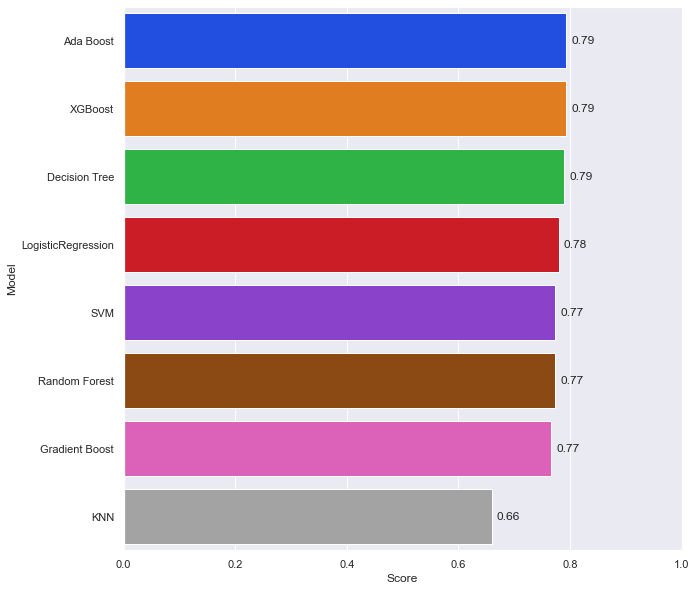

In [195]:
fig,ax = plt.subplots(figsize=(10,10))
barplot =sns.barplot(data=models,x='Score', y='Model',palette='bright',order=models.sort_values('Score',ascending=False).Model,ax=ax)
ax.set(xlim=(0,1))
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

### Create a pickle file using serialization

In [196]:
pickle_out = open("ada.pkl", "wb")
pickle.dump(ada,pickle_out)
pickle_out.close()